In [2]:
import os
import pandas as pd

#raw data directory
dataset_root_dir = '0_raw_dataset_large'

# Initialize empty lists to store file names, labels, and contents
file_names = []
labels = []
contents = []

# Traverse through each folder
for folder in os.listdir(dataset_root_dir):
    folder_path = os.path.join(dataset_root_dir, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith('.txt'):
                file_path = os.path.join(folder_path, file)
                with open(file_path, 'r', encoding='utf-8', errors='ignore') as txt_file:
                    file_contents = txt_file.read().strip()
                file_names.append(file)
                labels.append(folder)  # Store the folder name directly as the label
                contents.append(file_contents)

# Create a DataFrame from the lists with labels as folder names directly
df = pd.DataFrame({
    'file_id': file_names,
    'content': contents,
    'label': labels
})
label_counts = df['label'].value_counts()
print(label_counts)
# Sort the DataFrame by the 'label' column
df = df.sort_values(by='label', ascending=True)

# Display the DataFrame with labels as folder names
print(df)

# Specify the path where you want to save the CSV file
combined_data_path = '1_combined_dataset/combined.csv'
df.to_csv(combined_data_path, index=False)

print(f"Data saved to {combined_data_path}")

label
National News    7452
Sports           2285
Economy          1188
Entertainment    1174
Opinion           590
Bank              351
Tourism           214
World             212
Blog              209
Employment        154
Business          142
Technology        110
Name: count, dtype: int64
       file_id                                            content  label
1688  1800.txt  ﻿काठमाडौं, ५ जेठ – नेपालमा युवा वर्गलाई अनावश्...   Bank
1750  1765.txt  ﻿यादव हुमागाई\nकाठमाडौं, १९ माघ – नेपाल राष्ट्...   Bank
1749  1759.txt  ﻿इटलीका तटरक्षकले भनेका छन्, उनीहरुले सोमबार भ...   Bank
1748  1761.txt  ﻿९ पुस, काठमाडौं । यतिखेर राष्ट्रको ढुकुटीको प...   Bank
1747  1775.txt  ﻿कारोबार संवाददाता\nनेपालगञ्ज, २७ असार\nनेपालग...   Bank
...        ...                                                ...    ...
3844  3803.txt  ﻿मधेशबादी दलहरुले भुमिगत गिरोहसँग मिलेर सरकारब...  World
3845  3744.txt  ﻿संयुक्त राज्य अमेरिकाका राष्ट्रपति बाराक ओबाम...  World
3846  3750.txt  ﻿भाद्र १६, काठमाण्डौं । इजरायलल

In [59]:
import pandas as pd

# Specify the path to the CSV file
combined_data_path = '1_combined_dataset/combined.csv'

# Load the CSV into a DataFrame
df = pd.read_csv(combined_data_path)

# Display basic info about the DataFrame
print("DataFrame Info:")
print(df.info())
print("\nTotal Rows:", len(df))

# Sample 8 random rows from the DataFrame
samples = df.sample(n=8, random_state=42)  # random_state ensures reproducibility

# Display the 8 samples
print("\n8 Random Samples:")
print(samples[['file_id', 'content', 'label']])

# Save the 8 samples to a new CSV file
output_path = '1_combined_dataset/8_samples.csv'
samples.to_csv(output_path, index=False)
print(f"\nSamples saved to {output_path}")

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14081 entries, 0 to 14080
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   file_id  14081 non-null  object
 1   content  14081 non-null  object
 2   label    14081 non-null  object
dtypes: object(3)
memory usage: 330.2+ KB
None

Total Rows: 14081

8 Random Samples:
         file_id                                            content  \
6627   11535.txt  ﻿राजविराज, २० फागुन । विगत ६ महिनायताको लामो म...   
5272   13823.txt  ﻿नेकपा माओवादीले विश्व कम्युनिस्ट आन्दोलनका ने...   
13819     96.txt  ﻿\n२९ माघ, मोरङ । मोरङका ११२ होटलमा चार प्रकार...   
2900    3093.txt  ﻿राजविराज, ४ भदौ । सामुदायिक रेडियो छिन्नमस्ता...   
327     1804.txt  ﻿विराटनगर, १८ फागुन – विराटलक्ष्मी विकास बैंकल...   
8101   11849.txt  ﻿१६ माघ, काठमाडौं । नेपाल टेलिकमको शनिबार नेपा...   
5489   10901.txt  ﻿राजविराज, ३ वैशाख । नेपाल पत्रकार महासंघ शाखा...   
4337    8375.txt  ﻿\n६ माघ, काठमाडौं ।

In [4]:
import pandas as pd
import json
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv("1_combined_dataset/combined.csv")

# Encode labels and save mapping
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
label_mapping = {label: int(code) for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

# Save label mapping to JSON
with open("1_combined_dataset/label_mapping.json", "w") as file:
    json.dump(label_mapping, file)

# Define your preprocess function if not already defined
def preprocess(text):
    return text.lower()  # Example: convert to lowercase

# Preprocess the 'content' column
data['content'] = data['content'].apply(preprocess)

# Save the encoded and preprocessed data back to CSV
data.to_csv("1_combined_dataset/encoded_combined.csv", index=False)

print(data)

        file_id                                            content  label
0      1800.txt  ﻿काठमाडौं, ५ जेठ – नेपालमा युवा वर्गलाई अनावश्...      0
1      1765.txt  ﻿यादव हुमागाई\nकाठमाडौं, १९ माघ – नेपाल राष्ट्...      0
2      1759.txt  ﻿इटलीका तटरक्षकले भनेका छन्, उनीहरुले सोमबार भ...      0
3      1761.txt  ﻿९ पुस, काठमाडौं । यतिखेर राष्ट्रको ढुकुटीको प...      0
4      1775.txt  ﻿कारोबार संवाददाता\nनेपालगञ्ज, २७ असार\nनेपालग...      0
...         ...                                                ...    ...
14076  3803.txt  ﻿मधेशबादी दलहरुले भुमिगत गिरोहसँग मिलेर सरकारब...     11
14077  3744.txt  ﻿संयुक्त राज्य अमेरिकाका राष्ट्रपति बाराक ओबाम...     11
14078  3750.txt  ﻿भाद्र १६, काठमाण्डौं । इजरायलले पश्चिम किनारक...     11
14079  3787.txt  ﻿भाद्र ७, काठमाण्डौं । चिन विश्वको सबैभन्दा ठू...     11
14080  3829.txt  ﻿स्पेनिस क्लब रियल मड्रिडका स्टाइकर क्रिष्टिया...     11

[14081 rows x 3 columns]


In [6]:
import re
import pandas as pd

# Load Nepali stopwords from file
nepali_stopwords = []
with open("0_nepali_corpus/nepali_stopwords.txt", "r", encoding='utf-8', errors='ignore') as file:
    nepali_stopwords = [line.strip() for line in file]
stopwords = set(nepali_stopwords)  # Convert to set for faster lookup

# Read the dataset
data = pd.read_csv("1_combined_dataset/encoded_combined.csv")

# Preprocess the dataset, including stopword removal
for i in range(len(data)):
    text = data.at[i, 'content']
    text = re.sub(r'[a-zA-Z0-9!@#$%^&*()_+\-=\[\]{};\'‘\\:"|<,./<>?~`।१२३४५६७८९०–÷]', '', text)
    text = re.sub(r'।', '', text)
    text = re.sub(r'\ufeff', '', text)
    text = re.sub(r'\\u200d', '', text)
    text = text.replace('\n', ' ')
    
    # Split text into words and remove stopwords
    words = text.split()
    text = ' '.join(word for word in words if word not in stopwords)
    
    # Update the DataFrame
    data.at[i, 'content'] = text

# Display the preprocessed DataFrame
print(data)

# Save preprocessed data
data.to_csv("2_preprocessed_dataset/preproccessed_data.csv", index=False)
print("Preprocessed data saved to '2_preprocessed_dataset/preproccessed_data.csv'")


        file_id                                            content  label
0      1800.txt  काठमाडौं जेठ नेपालमा युवा वर्गलाई अनावश्यक खर्...      0
1      1765.txt  यादव हुमागाई काठमाडौं माघ नेपाल राष्ट्र बैंकले...      0
2      1759.txt  इटलीका तटरक्षकले भनेका उनीहरुले सोमबार भूमध्ये...      0
3      1761.txt  पुस काठमाडौं यतिखेर राष्ट्रको ढुकुटीको प्राविध...      0
4      1775.txt  कारोबार संवाददाता नेपालगञ्ज असार नेपालगन्ज बजा...      0
...         ...                                                ...    ...
14076  3803.txt  मधेशबादी दलहरुले भुमिगत गिरोहसँग मिलेर सरकारबि...     11
14077  3744.txt  संयुक्त राज्य अमेरिकाका राष्ट्रपति बाराक ओबामा...     11
14078  3750.txt  भाद्र काठमाण्डौं इजरायलले पश्चिम किनारको हेक्ट...     11
14079  3787.txt  भाद्र काठमाण्डौं चिन विश्वको सबैभन्दा पोर्क मि...     11
14080  3829.txt  स्पेनिस क्लब रियल मड्रिडका स्टाइकर क्रिष्टियान...     11

[14081 rows x 3 columns]
Preprocessed data saved to '2_preprocessed_dataset/preproccessed_data.csv'


In [8]:
import pandas as pd

# Specify the path to the CSV file
combined_data_path = '2_preprocessed_dataset/preproccessed_data.csv'

# Load the CSV into a DataFrame
df = pd.read_csv(combined_data_path)

# Display basic info about the DataFrame
print("DataFrame Info:")
print(df.info())
print("\nTotal Rows:", len(df))

# Sample 8 random rows from the DataFrame
samples = df.sample(n=8, random_state=42)  # random_state ensures reproducibility

# Display the 8 samples
print("\n8 Random Samples:")
print(samples[['file_id', 'content', 'label']])

# Save the 8 samples to a new CSV file
output_path = '2_preprocessed_dataset/8_samples.csv'
samples.to_csv(output_path, index=False)
print(f"\nSamples saved to {output_path}")

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14081 entries, 0 to 14080
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   file_id  14081 non-null  object
 1   content  14079 non-null  object
 2   label    14081 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 330.2+ KB
None

Total Rows: 14081

8 Random Samples:
         file_id                                            content  label
6627   11535.txt  राजविराज फागुन विगत महिनायताको लामो मधेश आन्दो...      6
5272   13823.txt  नेकपा माओवादीले विश्व कम्युनिस्ट आन्दोलनका नेत...      6
13819     96.txt  माघ मोरङ मोरङका होटलमा प्रकारका स्टिकर वितरण ग...     10
2900    3093.txt  राजविराज भदौ सामुदायिक रेडियो छिन्नमस्ता एफएमक...      5
327     1804.txt  विराटनगर फागुन विराटलक्ष्मी विकास बैंकले कर्जा...      0
8101   11849.txt  माघ काठमाडौं नेपाल टेलिकमको शनिबार नेपाल टेलिक...      6
5489   10901.txt  राजविराज वैशाख नेपाल पत्रकार महासंघ शाखा सप्तर...    

In [69]:
import pandas as pd
from datasets import Dataset
from sklearn.model_selection import train_test_split

# Read preprocessed data and drop the file_id column
data = pd.read_csv("2_preprocessed_dataset/preproccessed_data.csv")
data = data.drop(columns=['file_id'])  # Dropping the first column (file_id)

# Convert DataFrame to Hugging Face Dataset
dataset = Dataset.from_pandas(data)

# Ensure the target labels are in the DataFrame (assuming the label column is named 'label')
labels = data['label']  # Replace 'label' with your actual label column name

# Stratified split into train and test sets and validation sets
train_data, test_data = train_test_split(data, test_size=0.3, stratify=labels, random_state=42)

validation_data, test_data = train_test_split(test_data, test_size=0.5, stratify=test_data['label'], random_state=42)

# Convert splits back to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_data)
validation_dataset = Dataset.from_pandas(validation_data)
test_dataset = Dataset.from_pandas(test_data)


# Save train, validation, and test datasets
# Convert Hugging Face Datasets to Pandas DataFrames before saving
train_df = train_dataset.to_pandas()
validation_df = validation_dataset.to_pandas()
test_df = test_dataset.to_pandas()

train_df = train_df.drop(columns = ['__index_level_0__'])
validation_df = validation_df.drop(columns = ['__index_level_0__'])
test_df = test_df.drop(columns = ['__index_level_0__'])
print(train_df,validation_df,test_df)

# Save as CSV files
train_df.to_csv("3_split_data/train.csv", index=False) 
validation_df.to_csv("3_split_data/validation.csv", index=False) 
test_df.to_csv("3_split_data/test.csv", index=False)


                                                content  label
0     भुवन पौडेल काठमाडौं चैत धितोपत्रको बजारमा सानो...      0
1     राजविराज चैत नेपाली कांग्रेसका युवा नेता चन्द्...      6
2     फागुन विराटनगर पूर्वको प्रमुख शहर विराटनगरमा अ...      6
3     चैत बिराटनगर उपप्रधानमन्त्री एवं स्थानीय विकास...      6
4     चैत काठमाडौं अमेरिकाले उत्तर कोरियामा जेल सजाय...      6
...                                                 ...    ...
9851  चैत सिराहा एकीकृत नेकपा माओवादीका अध्यक्ष पुष्...      6
9852  समयमा विभाजित माओवादी पार्टीहरूबीच एकताको प्रय...      7
9853  नेपालका युवा ब्याडमिन्टन खेलाडी रत्नजीत तामाङ ...      8
9854  सन् सम्पन्न नेपाल भारत शान्ति मैत्री सन्धी भार...      6
9855  राजविराज जेठ राष्ट्रिय जनता पार्टी नेपालको अवर...      6

[9856 rows x 2 columns]                                                 content  label
0     भदौ काठमाडौ केपी ओली नेतृत्वको सरकारले महिनामा...      6
1     इटालीका अनुभवी गोलरक्षक जियानलुइगी बुफोनले अन्...      8
2     वैशाख जनकपुरधाम शक्तिका 

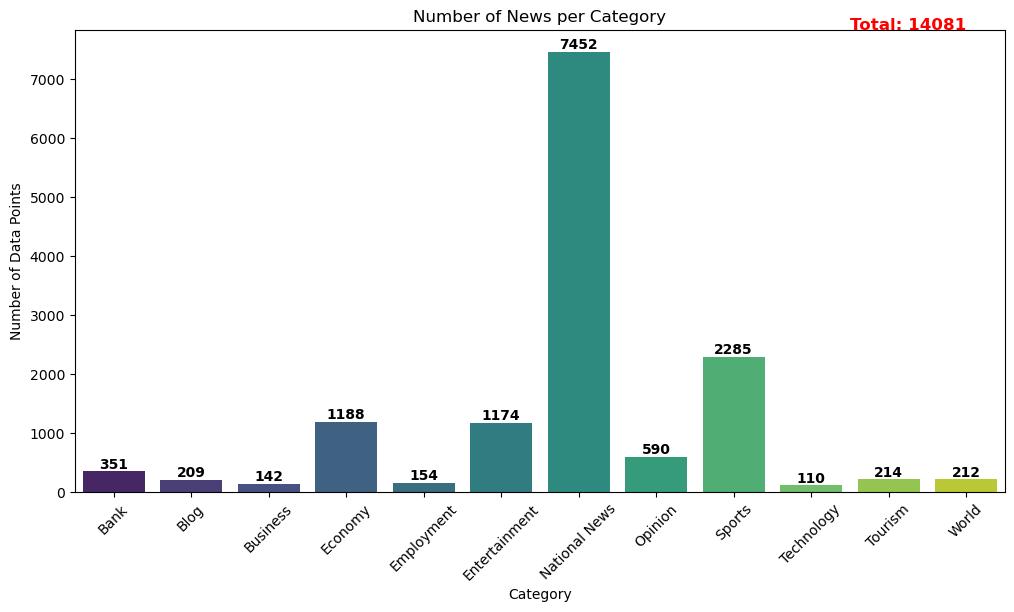

In [10]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load the label mapping from JSON
label_mapping_path = '1_combined_dataset/label_mapping.json'
with open(label_mapping_path, 'r') as json_file:
    label_mapping = json.load(json_file)

# Reverse the label mapping to get category names by their encoded values
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Load the dataset and drop the 'file_id' column if it exists
df = pd.read_csv("1_combined_dataset/encoded_combined.csv")
if 'file_id' in df.columns:
    df = df.drop(columns=['file_id'])

# Map the numerical labels back to category names
df['label'] = df['label'].map(reverse_label_mapping)

# Count the number of occurrences of each label in the original order
label_counts = df['label'].value_counts()
label_counts = label_counts.reindex(reverse_label_mapping.values(), fill_value=0)  # Keep original order

# Calculate the total number of data points
total_count = label_counts.sum()

# Plot the distribution of labels
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, hue=label_counts.index, palette="viridis", legend=False)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Add total count annotation
plt.text(len(label_counts) - 1, max(label_counts.values) * 1.05,  # Position at the top right
         f'Total: {total_count}', fontsize=12, color='red', fontweight='bold', ha='right')

plt.title('Number of News per Category')
plt.xlabel('Category')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=45)
# Save the figure as an image before displaying
plt.savefig("total_categorized_data_in_bar_graph.png", dpi=300, bbox_inches='tight')
plt.show()


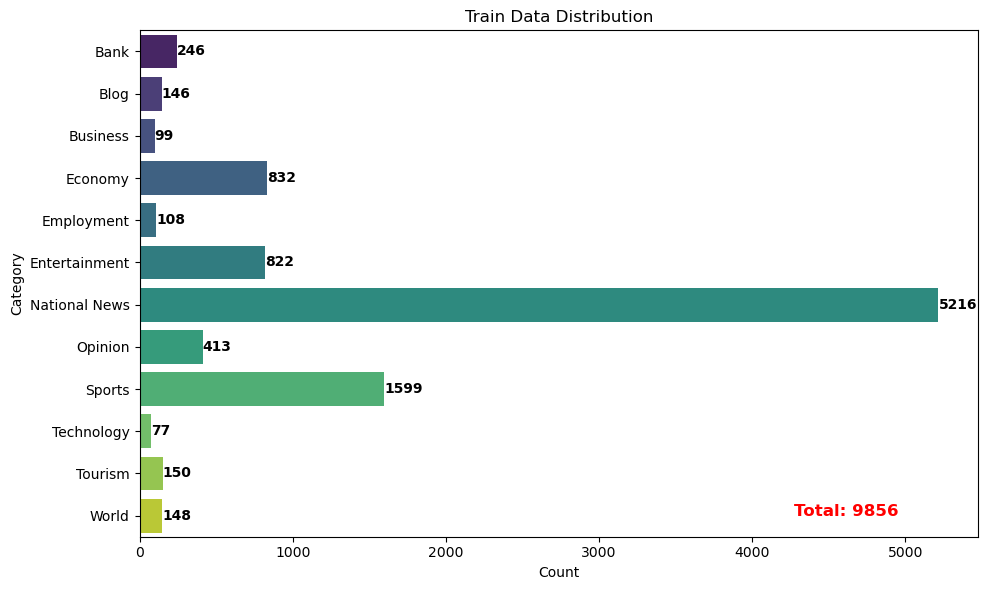

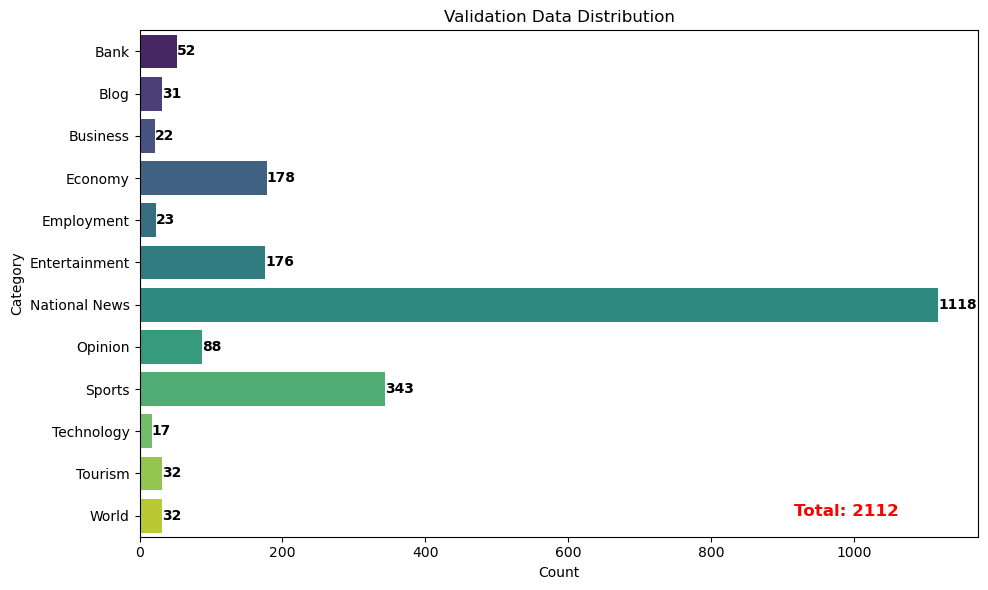

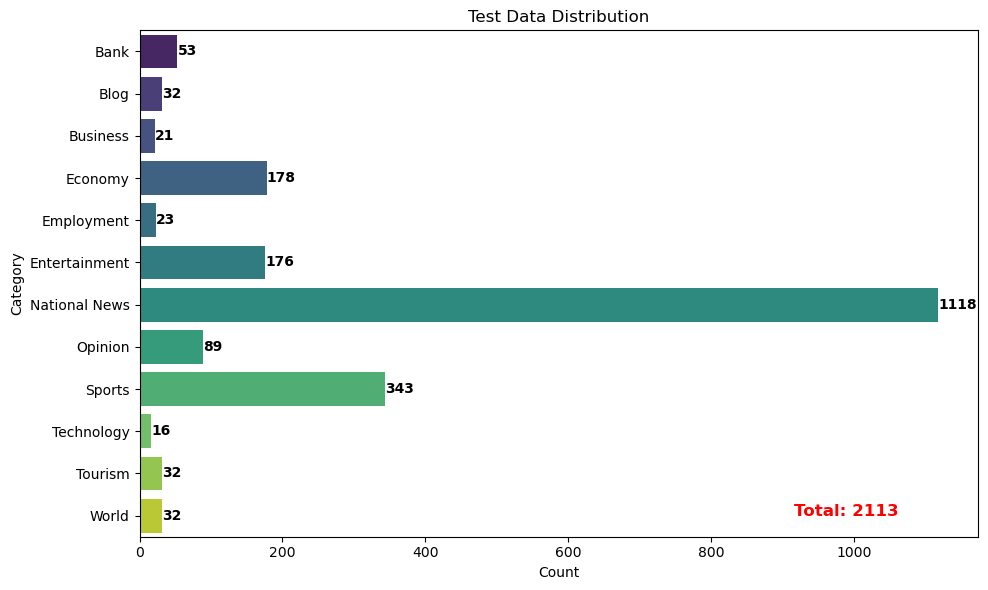

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load the label mapping from JSON
label_mapping_path = '1_combined_dataset/label_mapping.json'
with open(label_mapping_path, 'r') as json_file:
    label_mapping = json.load(json_file)

# Reverse the label mapping to get category names by their encoded values
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# File paths for train, validation, and test sets
file_paths = {
    "Train": "3_split_data/train.csv",
    "Validation": "3_split_data/validation.csv",
    "Test": "3_split_data/test.csv"
}

for dataset_name, path in file_paths.items():
    # Load dataset and drop 'file_id' column if it exists
    df = pd.read_csv(path)
    if 'file_id' in df.columns:
        df = df.drop(columns=['file_id'])

    # Map the numerical labels back to category names
    df['label'] = df['label'].map(reverse_label_mapping)

    # Count occurrences of each category
    label_counts = df['label'].value_counts()
    label_counts = label_counts.reindex(reverse_label_mapping.values(), fill_value=0)  # Keep original order

    # Calculate total data points
    total_count = label_counts.sum()

    # Create a new figure for each dataset
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(y=label_counts.index, x=label_counts.values, hue=label_counts.index, palette="viridis")

    # Add count labels on bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}',  # Adjust position for horizontal bars
                    (p.get_width(), p.get_y() + p.get_height() / 2.), 
                    ha='left', va='center', fontsize=10, color='black', fontweight='bold')

    # Add total count annotation
    plt.text(max(label_counts.values) * 0.95, len(label_counts) - 1,  # Position at the top right
             f'Total: {total_count}', fontsize=12, color='red', fontweight='bold', ha='right')

    plt.title(f'{dataset_name} Data Distribution')
    plt.xlabel('Count')
    plt.ylabel('Category')

    # Save each individual graph as PNG
    plt.tight_layout()
    plt.savefig(f"images/{dataset_name}_data_distribution.png", dpi=600, bbox_inches='tight')

    # Show the plot
    plt.show()
